In [2]:
import math
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import random 
import sys
import matplotlib.animation as animation
np.set_printoptions(threshold=sys.maxsize)

In [3]:
N = 100
dt = 1 
dx = 1
D_u = 0.16
D_v = 0.08
f = 0.035
k = 0.060
w = 1.9

In [4]:
def init(N, v_size):
    '''
    Initialize a grid with all zeros
    Args:
        -N the size of the grid
    Out: the initial state 
    of the grid
    '''
    u_grid = np.full((N,N), 0.5)
    v_grid = np.zeros((N,N))
    for i in np.arange(int(N/2-v_size),int(N/2+v_size),1):
        for j in np.arange(int(N/2-v_size),int(N/2+v_size),1):
            v_grid[i,j]=0.25
    return u_grid, v_grid

In [5]:
def GS_update(U_grid, D_u, V_grid, D_v, f, k, Noise = 0):
    U = np.copy(U_grid)
    V = np.copy(V_grid)
    for j in range(0,len(U)):
        for i in range(0,len(U)):
            u = U[j,i]
            v = V[j,i]
            
            grad_u = (D_u*dt / (dx**2)) * (U[(j+1)%len(U), i] + U[(j-1)%len(U),i]+ U[j,(i+1)%len(U)] +U[j,(i-1)%len(U)] - 4*u)
            U_grid[j,i] = u + (D_u * grad_u) - (u * v**2) + (f * (1-u))
            
            grad_v = (D_v*dt / (dx**2)) * (V[(j+1)%len(U), i] + V[(j-1)%len(U),i]+ V[j,(i+1)%len(U)] +V[j,(i-1)%len(U)] - 4*v)             
            V_grid[j,i] = v + (D_v * grad_v) + (u * v**2) - ((f+k) * v)
            if random.uniform() < 0.01:
                noise = random.uniform(-1,1) * Noise
                V_grid[j,i] = V_grid[j,i] + noise
    return U_grid, V_grid

In [6]:
def run(U_grid,V_grid,t_max, f , k, Noise=0):
    for t in range(t_max):
        U_grid, V_grid = GS_update(U_grid, D_u, V_grid, D_v, f, k, Noise)
        if t%100 == 0:
            fig, axes = plt.subplots(nrows=1, ncols=2)
            im1 = axes[0].imshow(U_grid,vmin=0, vmax=1,aspect='auto', cmap='viridis')
            axes[0].set_title("U grid")
            im2 = axes[1].imshow(V_grid,vmin=0, vmax=1,aspect='auto', cmap='viridis')
            axes[1].set_title("V grid")
            fig.subplots_adjust(right=0.85)
            cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
            fig.colorbar(im2, cax=cbar_ax)


<ipython-input-5-04f2d92872df>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=2)


f = 0.035 , k = 0.06
f = 0.06 , k = 0.01
f = 0.03 , k = 0.05


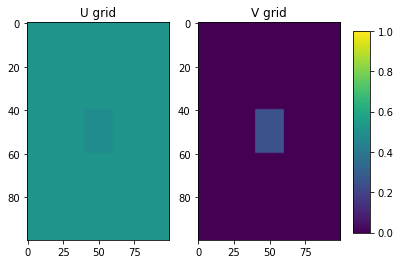

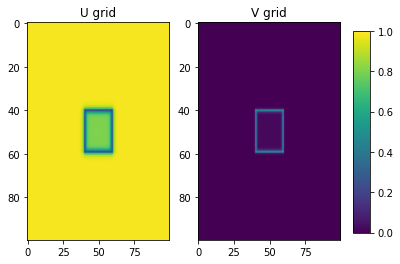

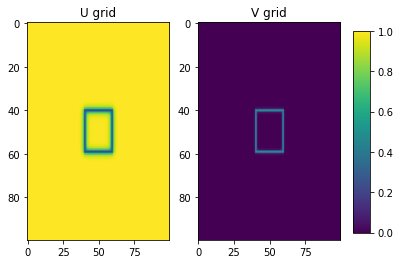

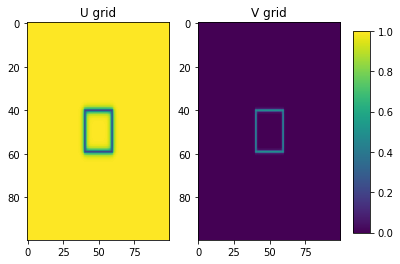

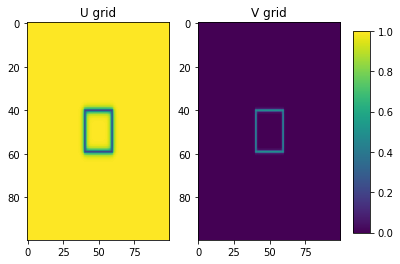

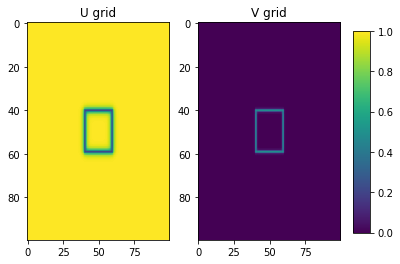

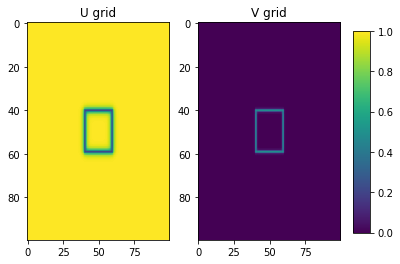

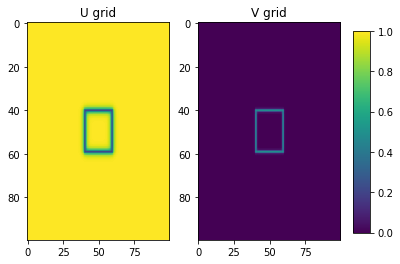

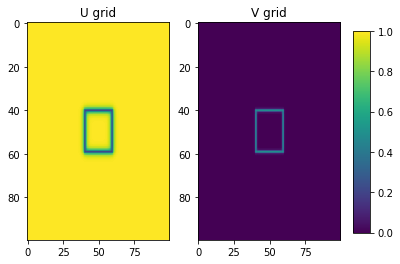

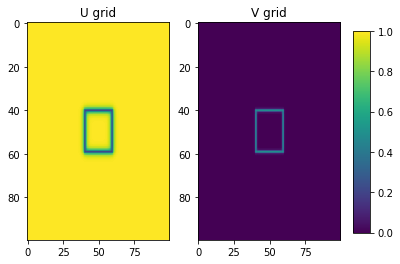

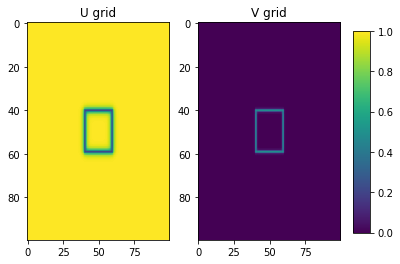

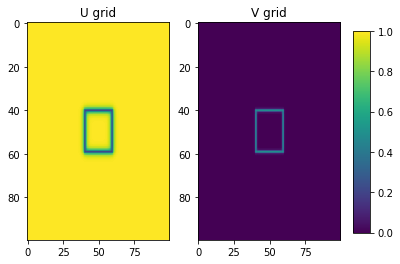

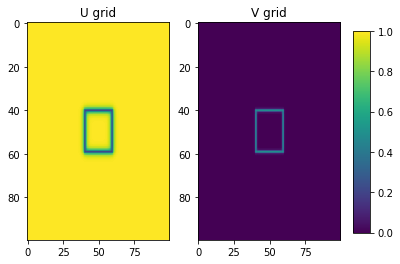

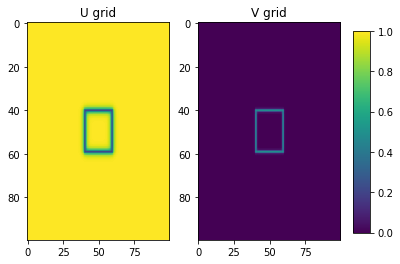

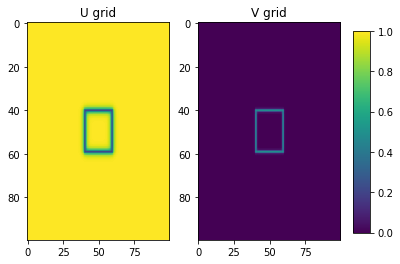

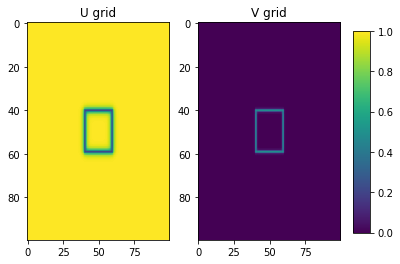

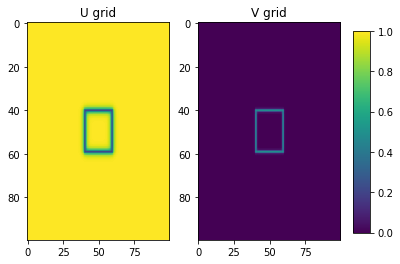

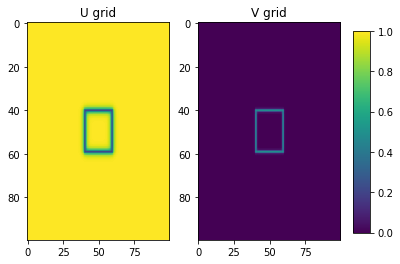

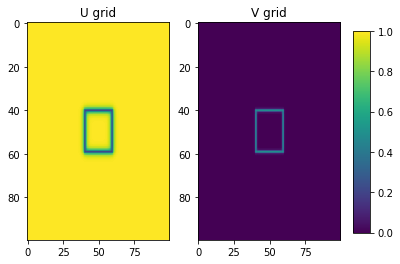

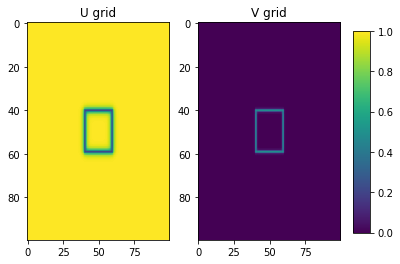

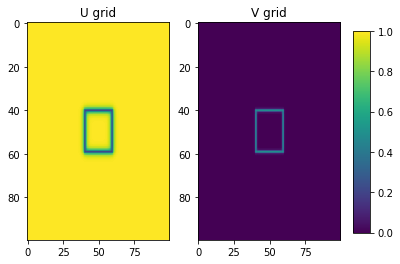

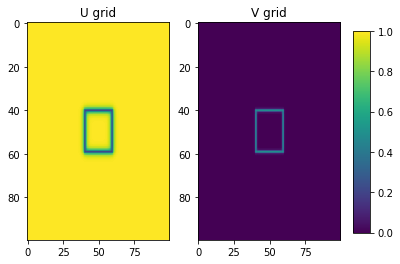

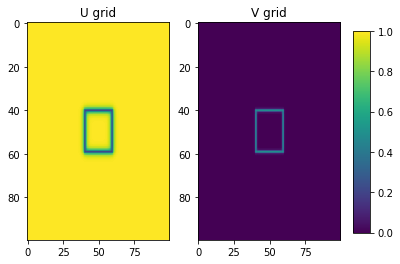

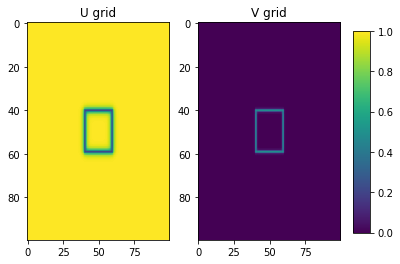

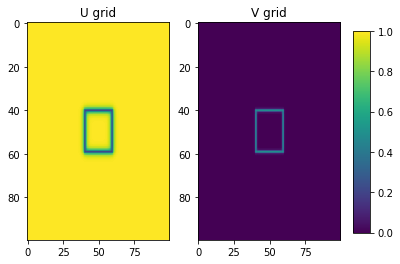

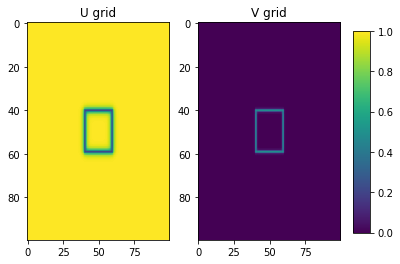

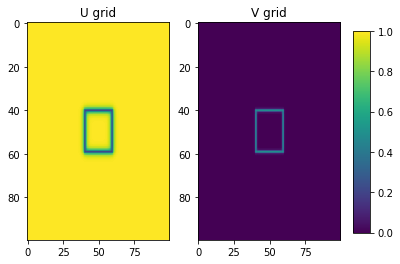

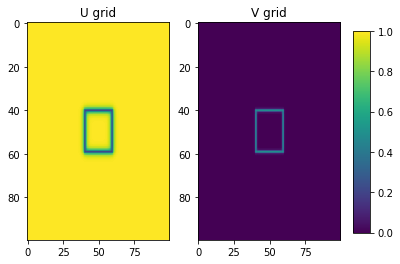

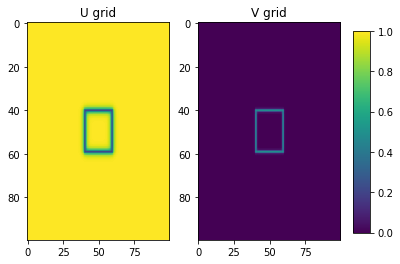

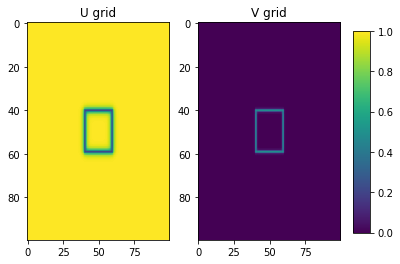

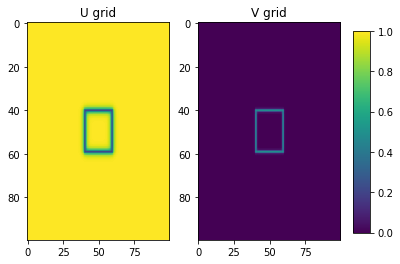

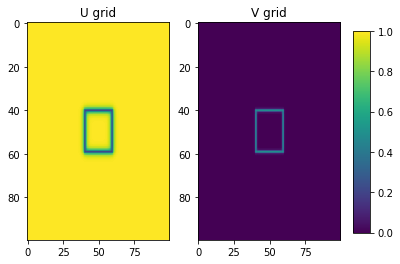

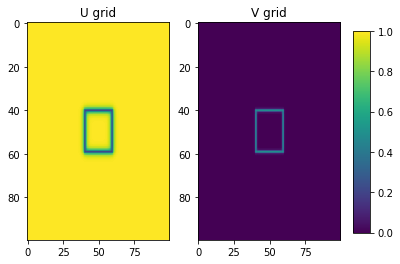

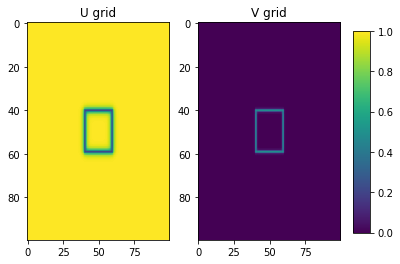

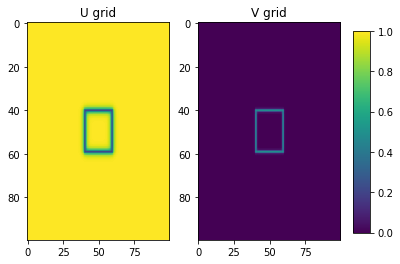

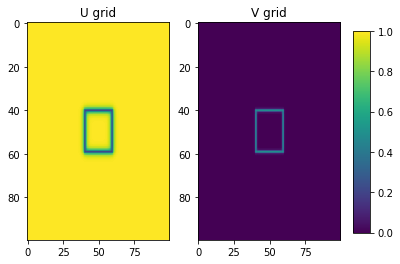

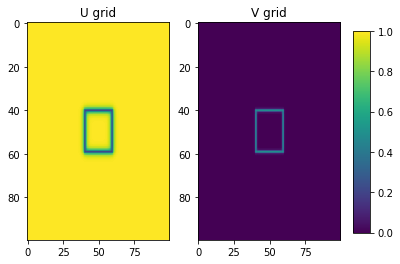

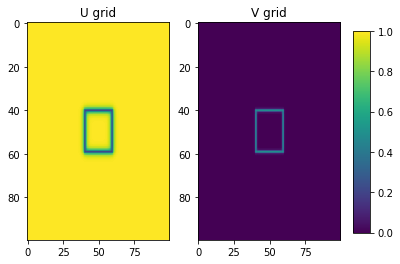

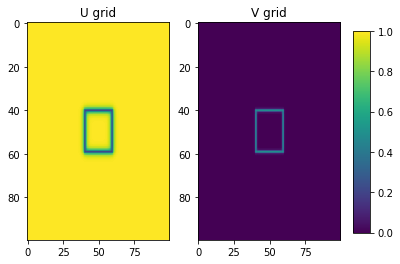

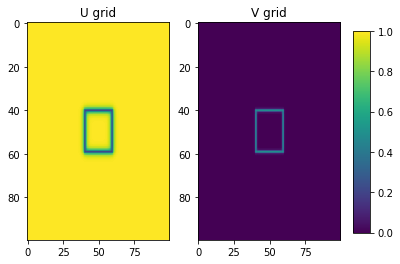

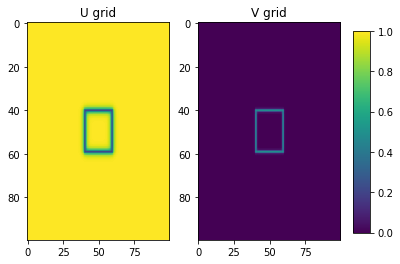

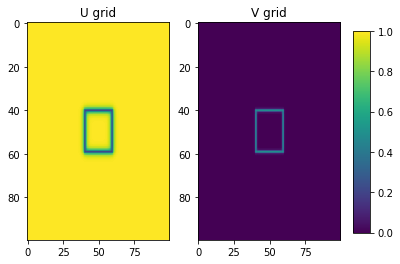

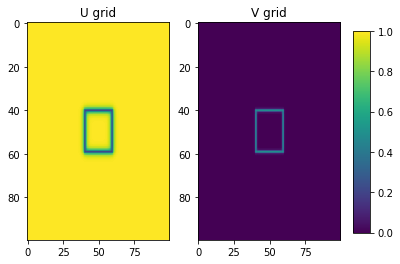

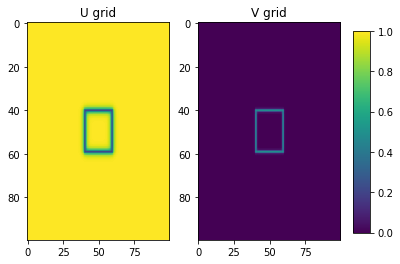

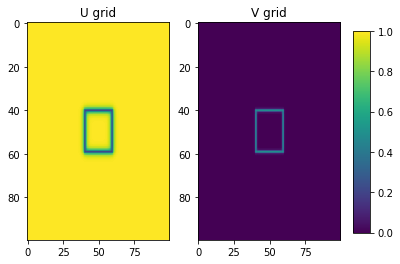

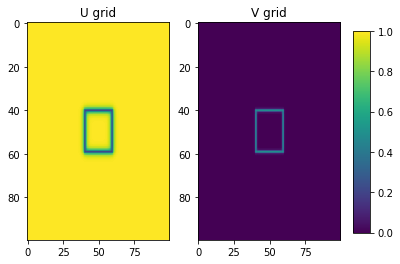

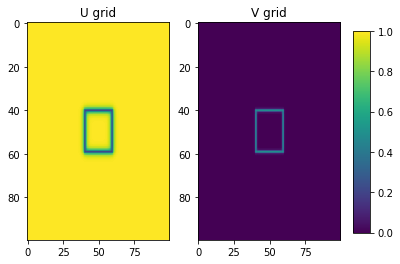

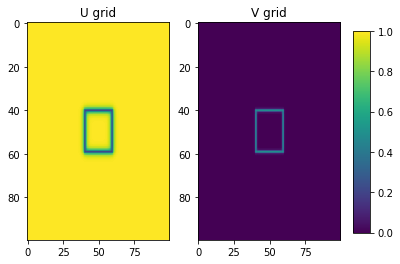

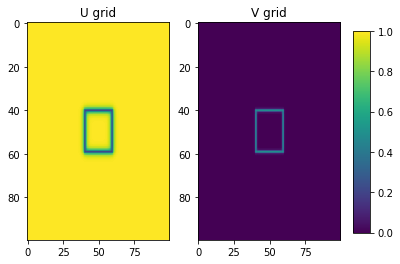

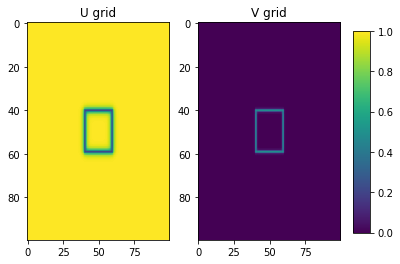

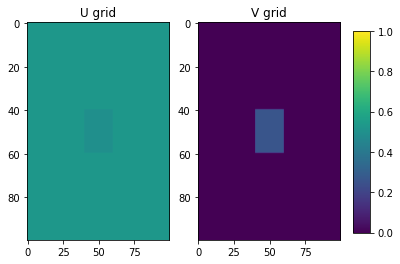

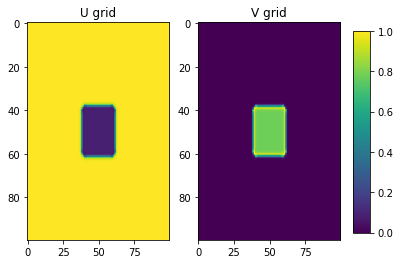

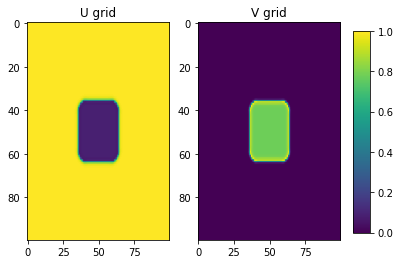

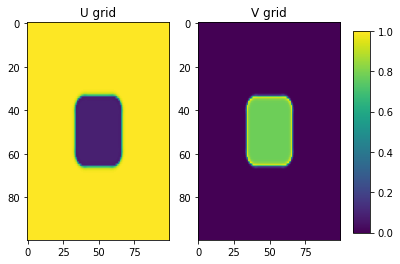

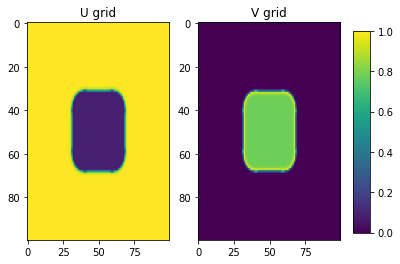

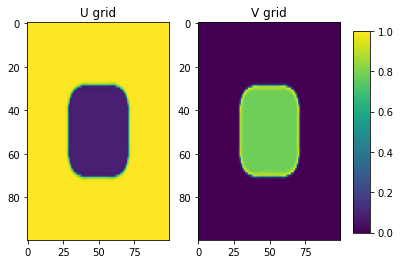

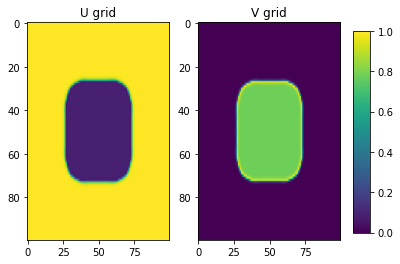

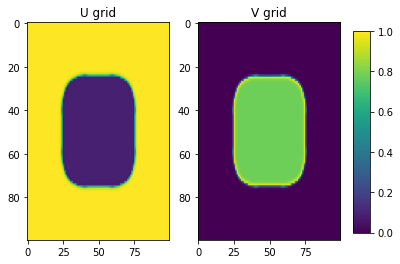

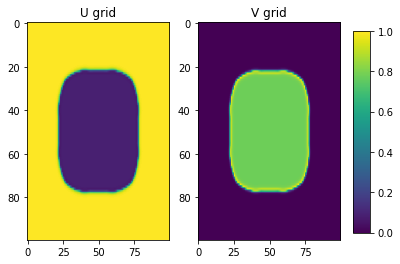

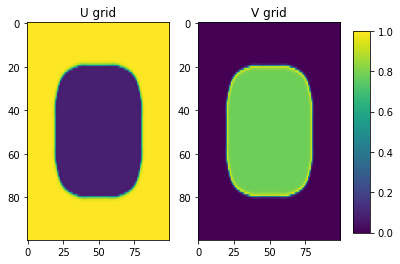

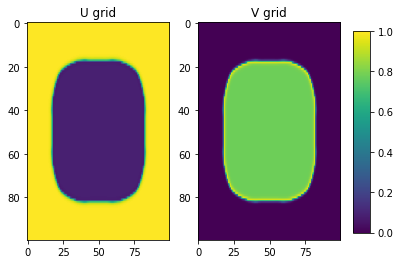

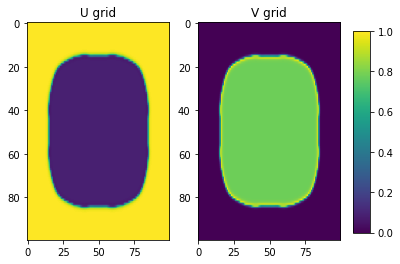

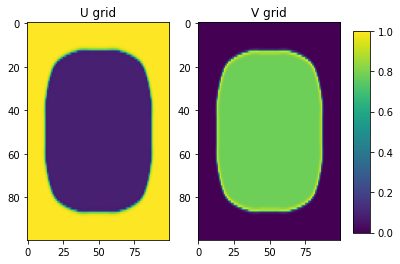

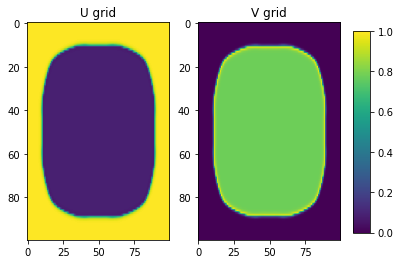

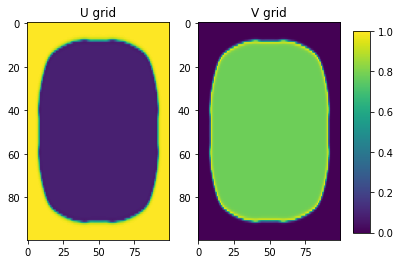

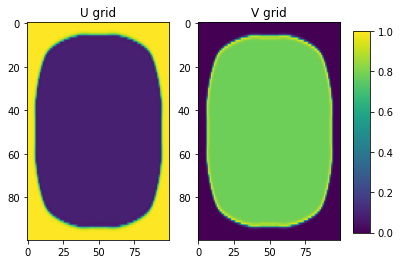

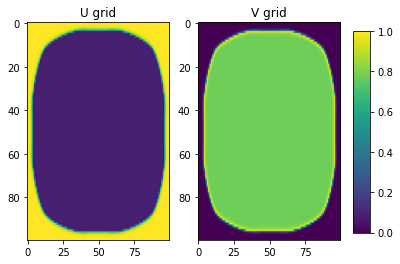

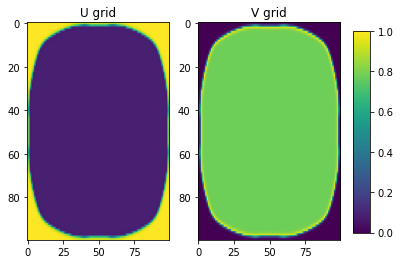

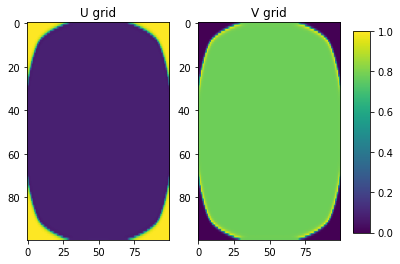

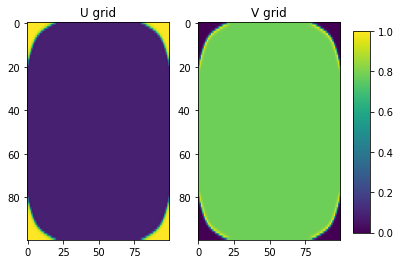

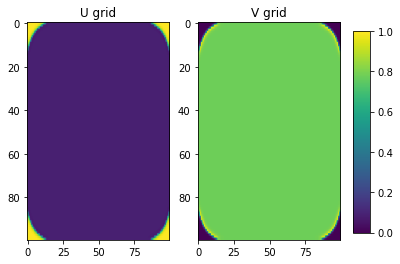

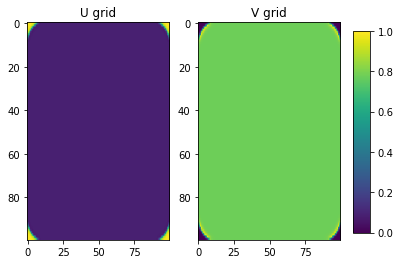

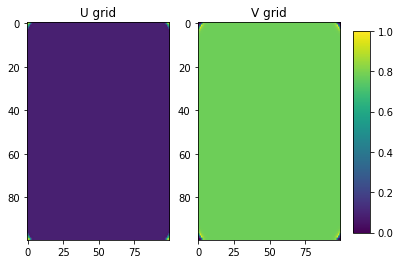

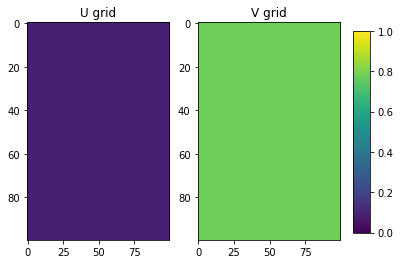

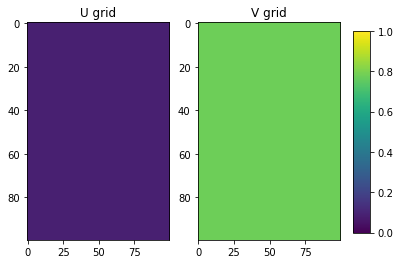

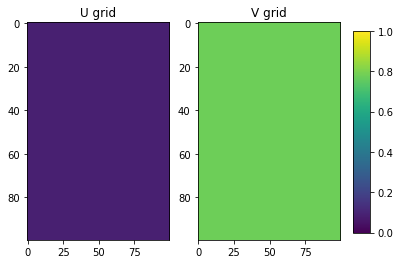

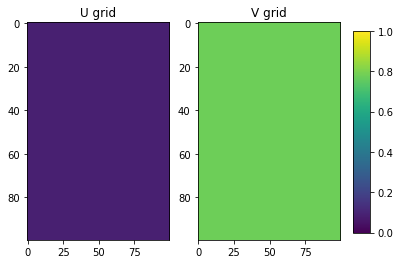

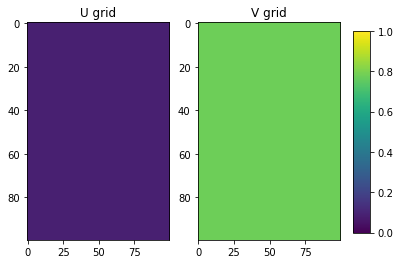

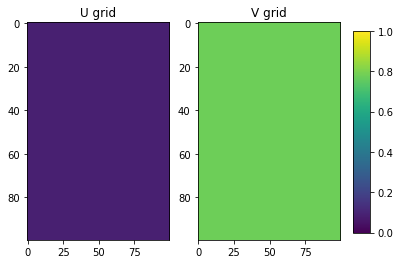

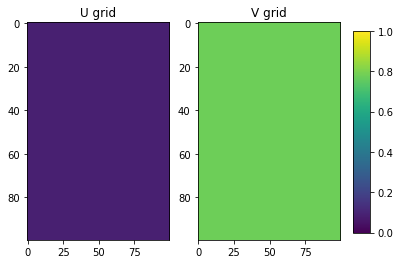

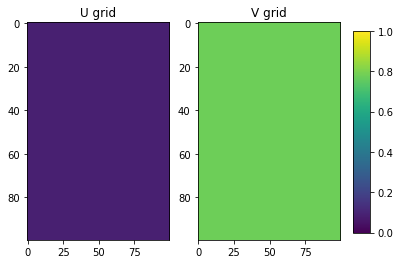

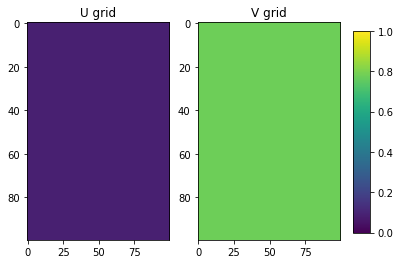

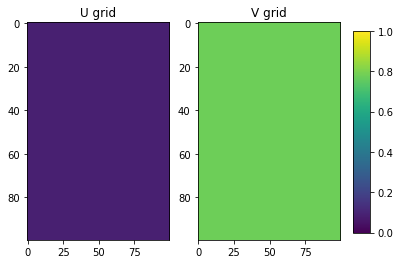

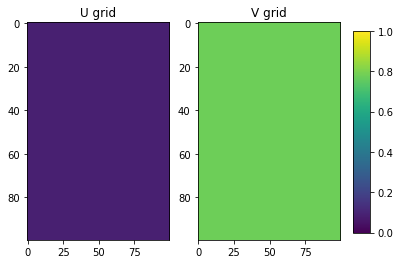

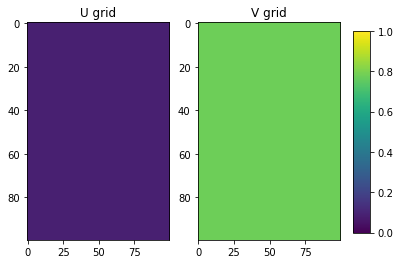

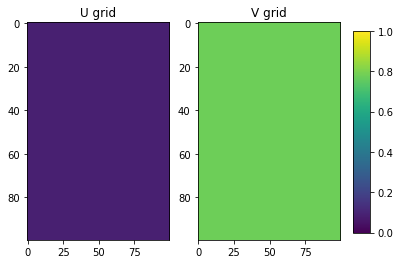

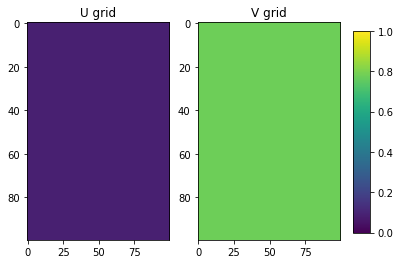

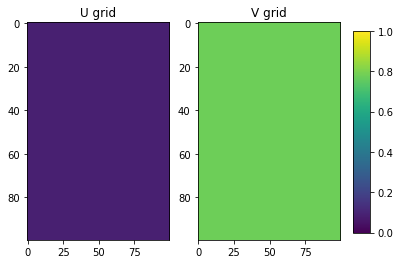

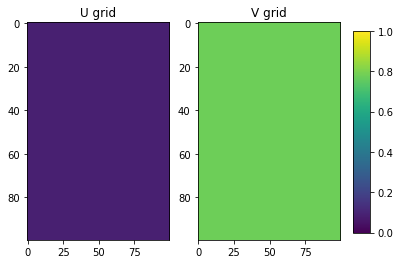

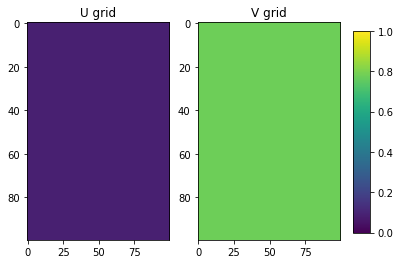

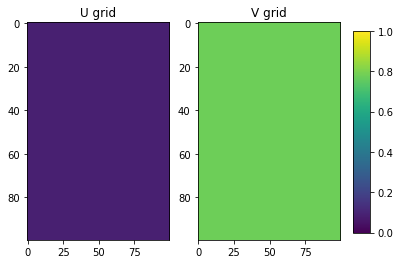

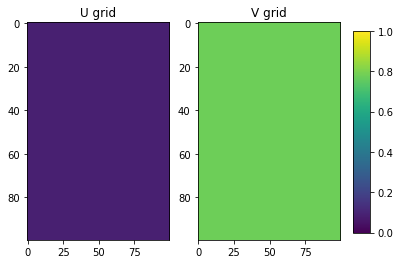

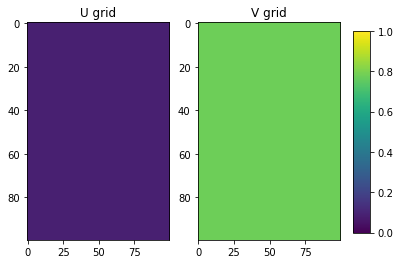

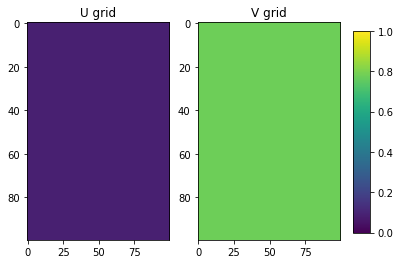

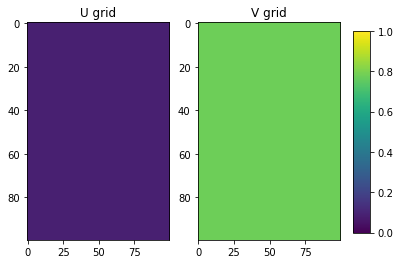

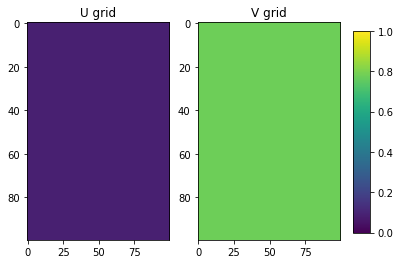

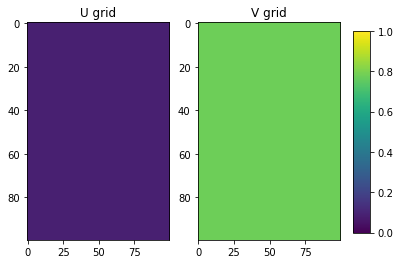

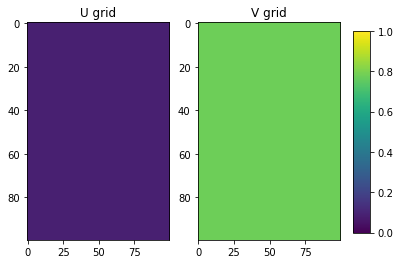

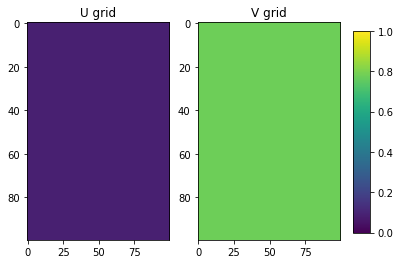

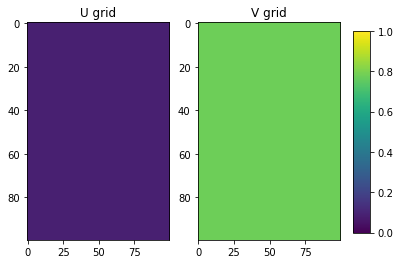

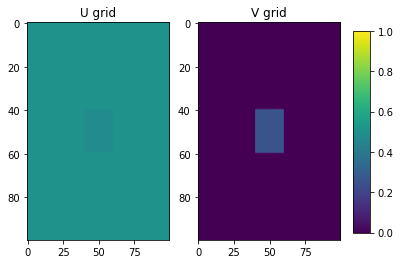

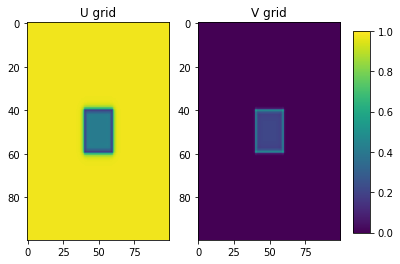

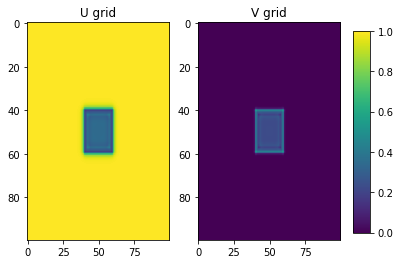

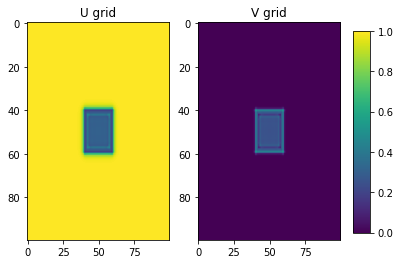

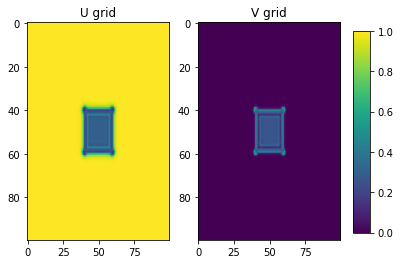

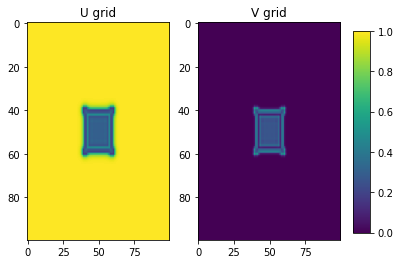

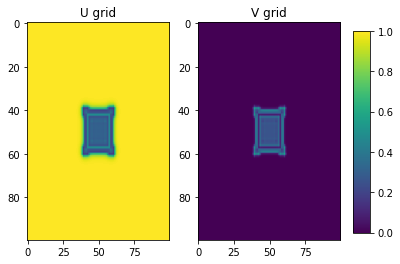

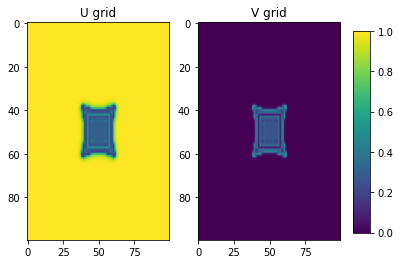

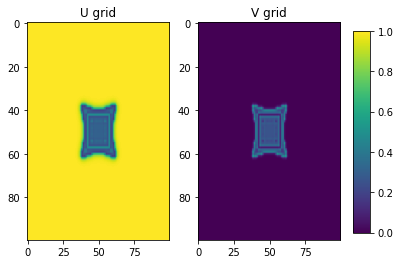

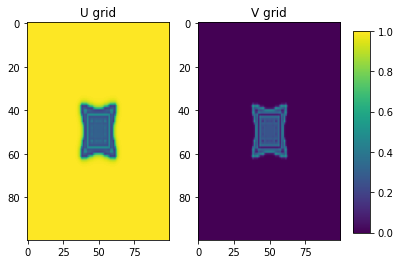

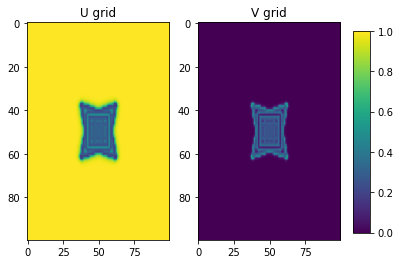

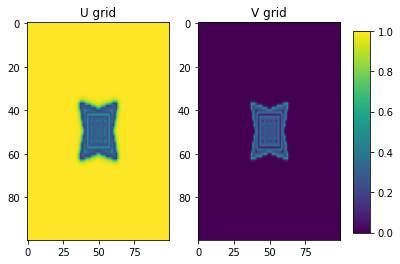

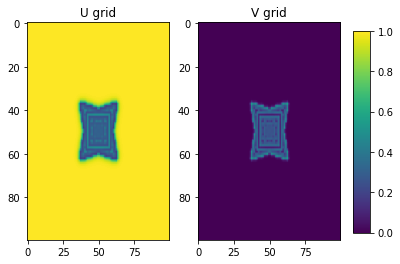

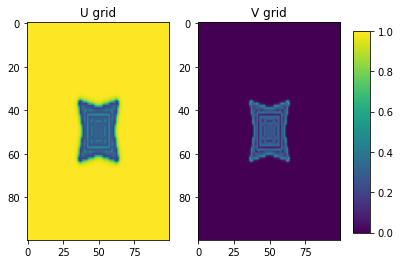

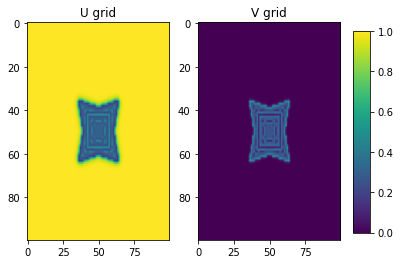

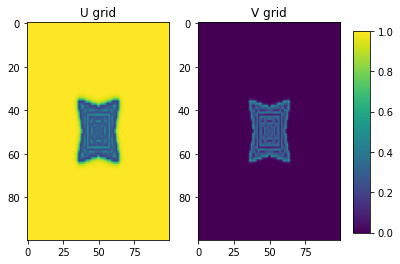

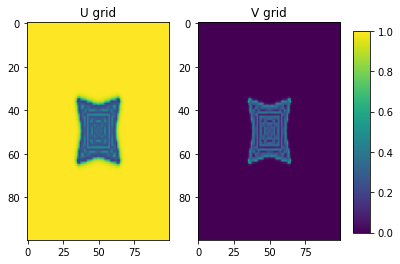

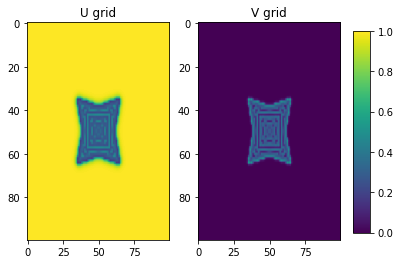

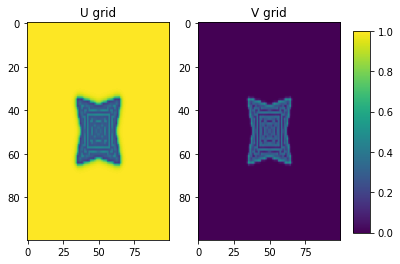

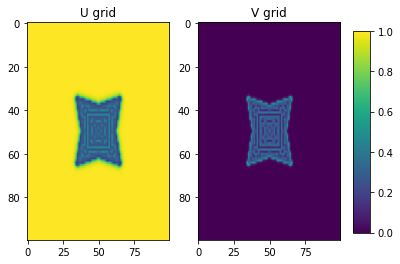

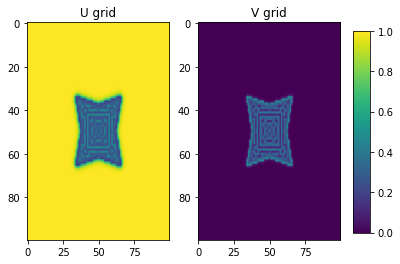

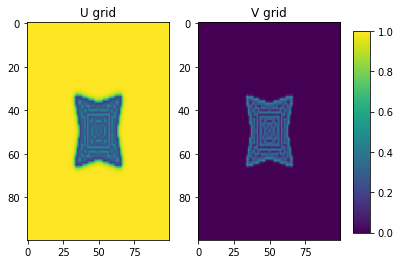

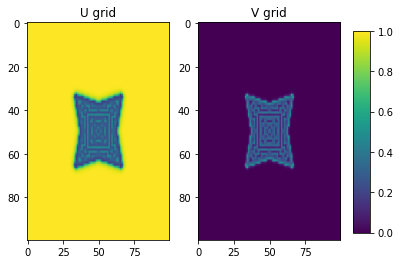

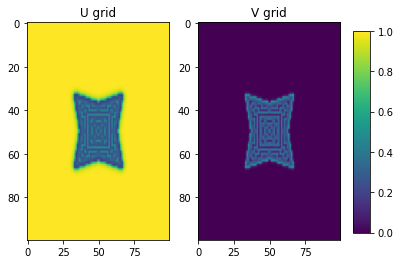

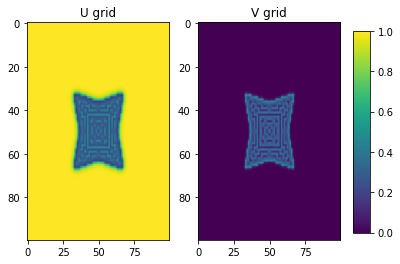

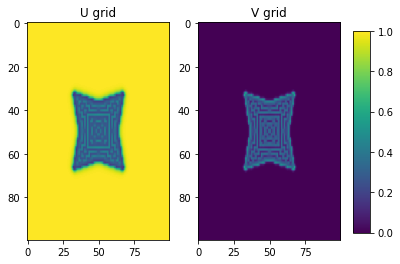

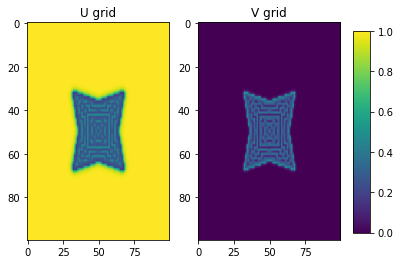

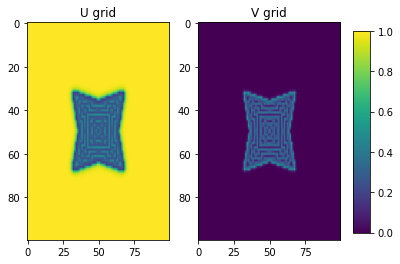

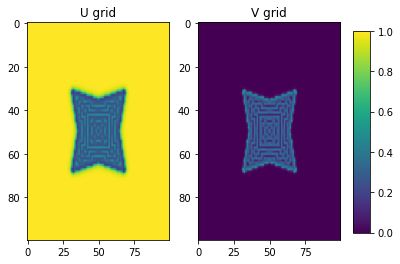

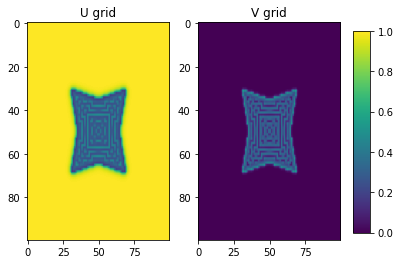

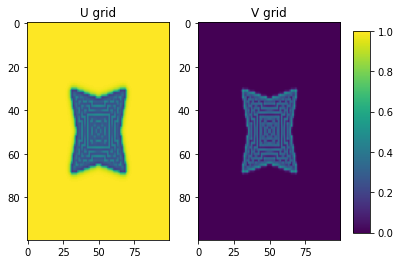

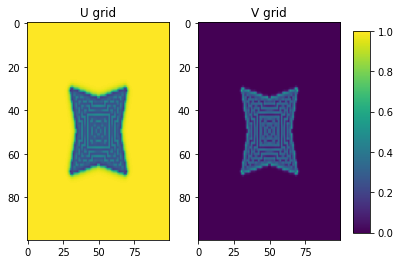

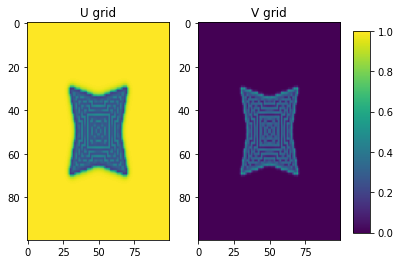

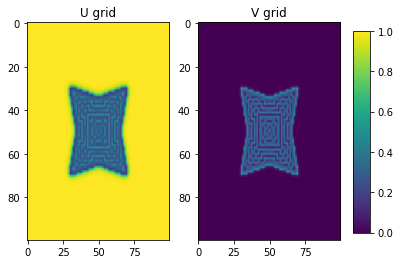

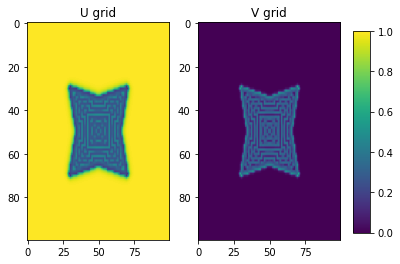

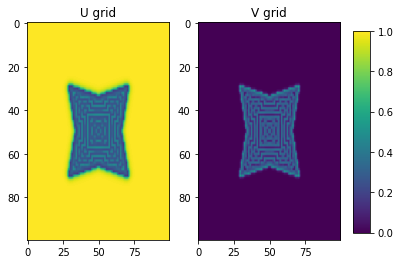

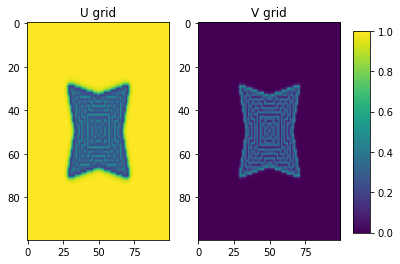

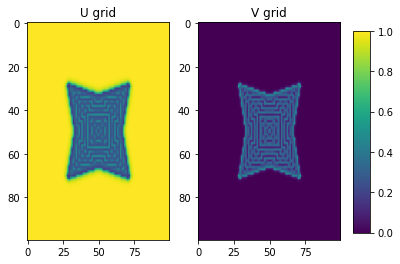

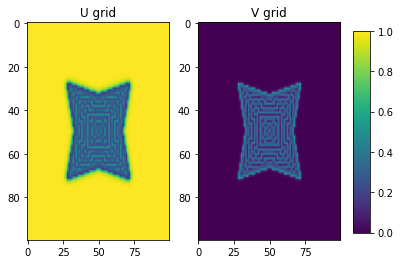

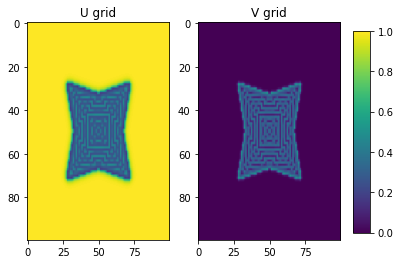

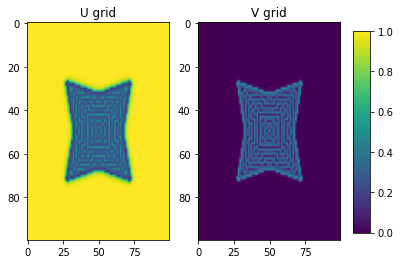

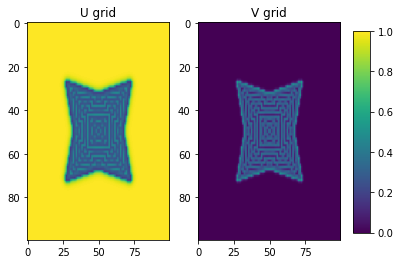

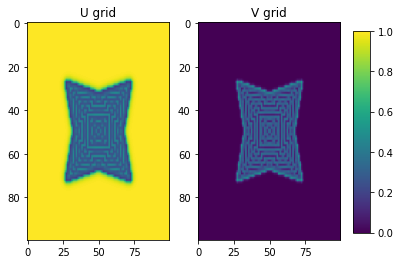

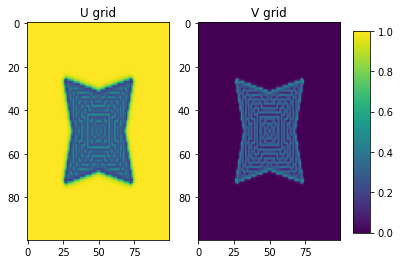

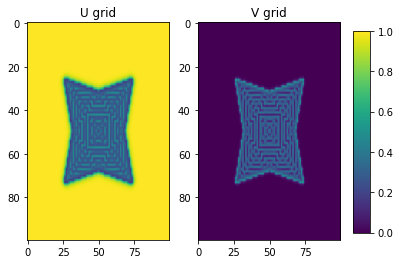

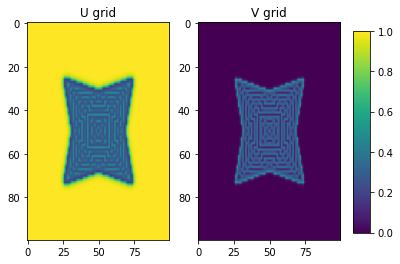

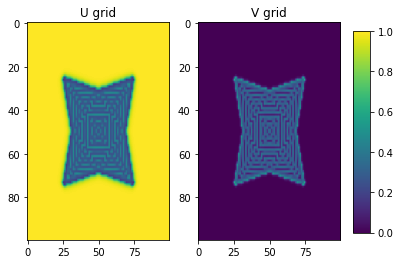

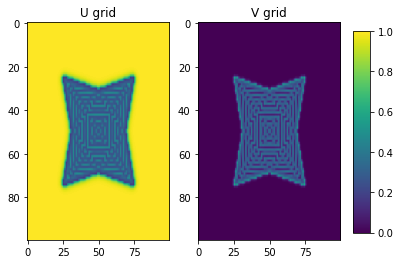

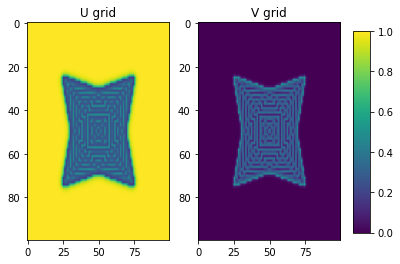

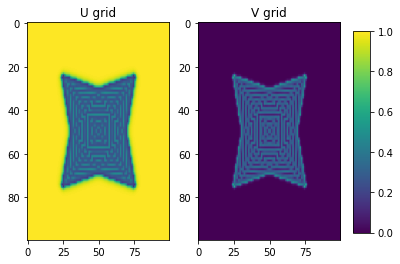

In [9]:
f_list = [0.035, 0.06, 0.03]
k_list = [0.060, 0.01, 0.05]

for i in range(len(f_list)):
    U_grid,V_grid = init(N,10)
    run(U_grid,V_grid,5000, f_list[i] , k_list[i])
    print('f =', f_list[i] ,', k =', k_list[i] )
    

<ipython-input-6-8d1437cf9dd3>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrows=1, ncols=2)


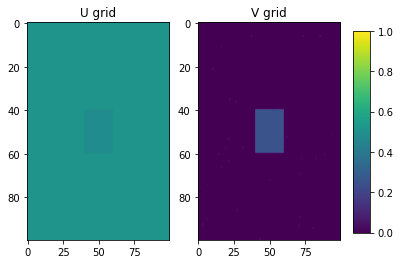

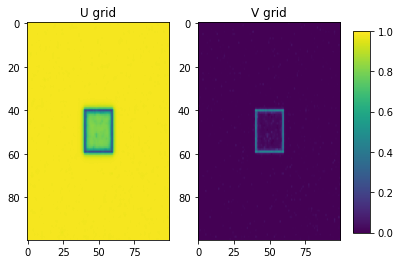

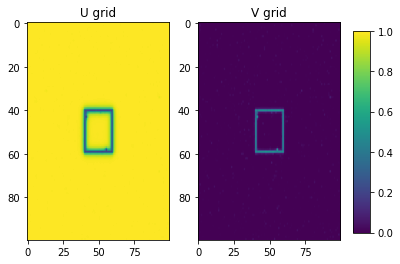

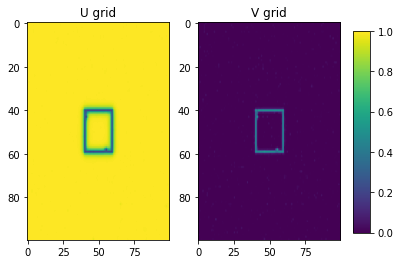

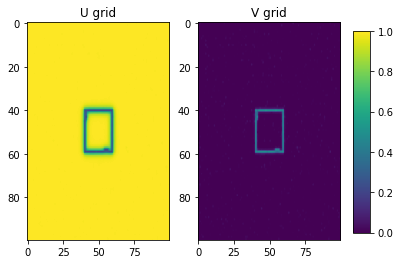

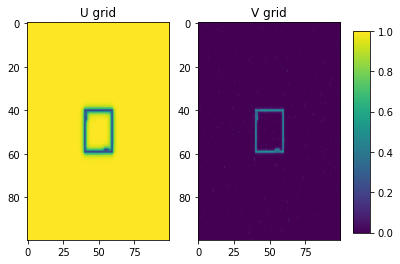

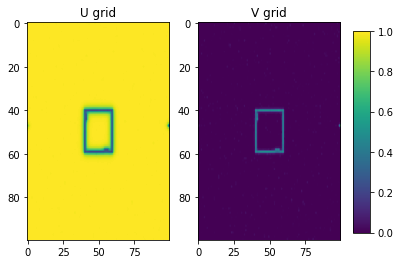

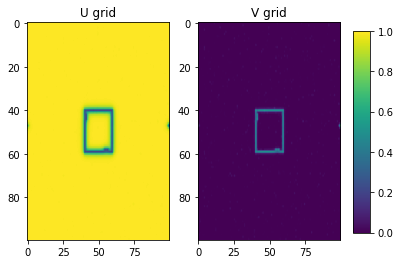

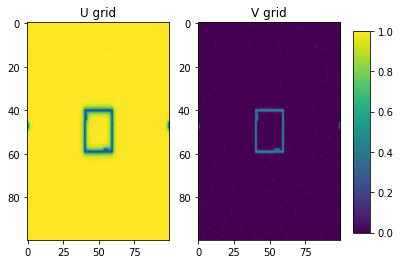

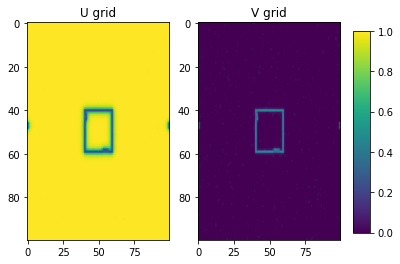

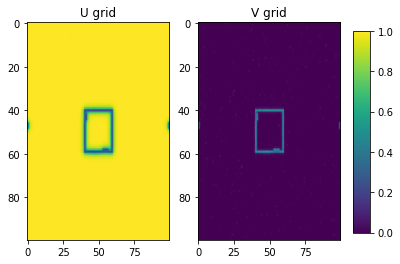

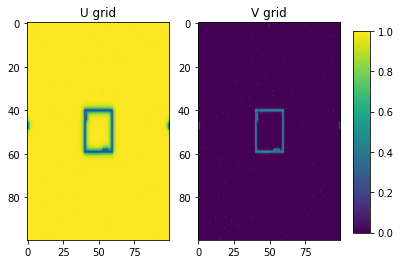

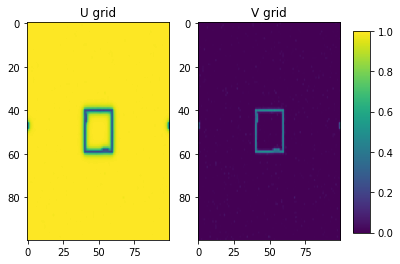

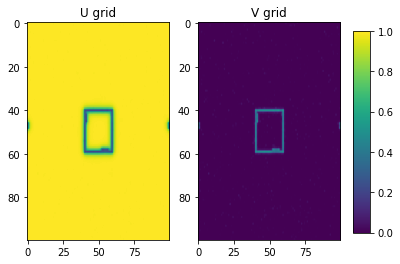

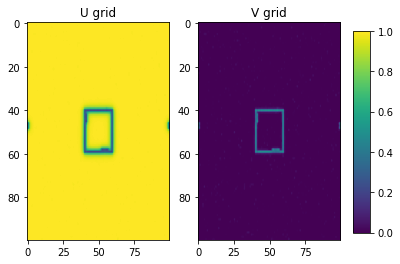

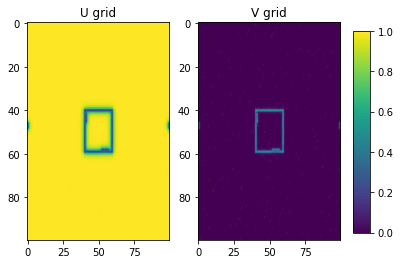

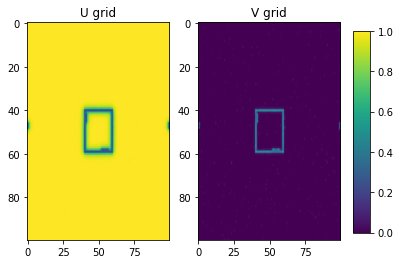

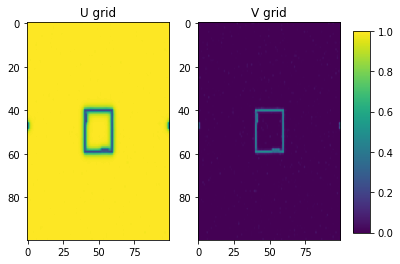

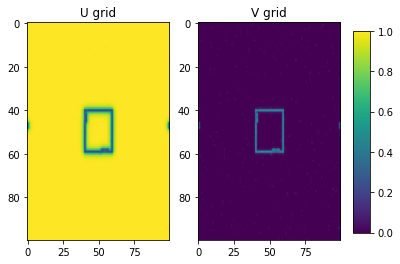

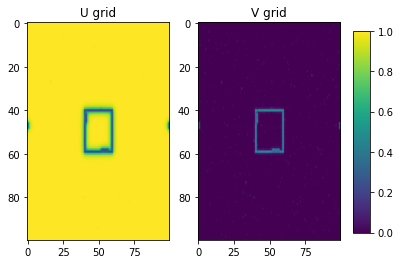

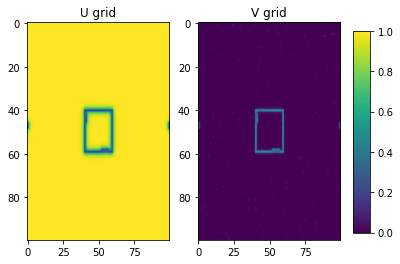

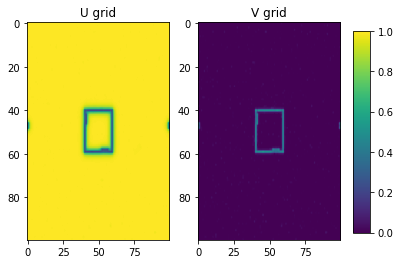

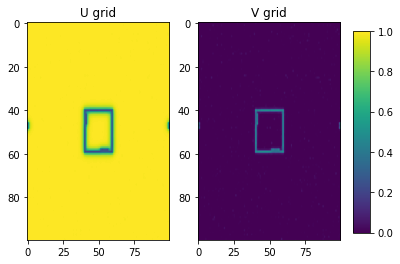

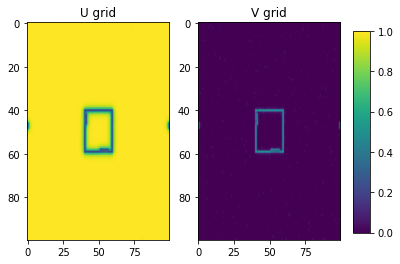

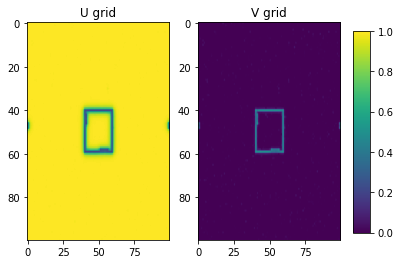

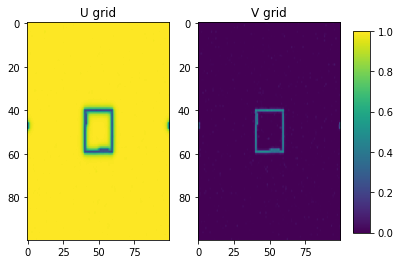

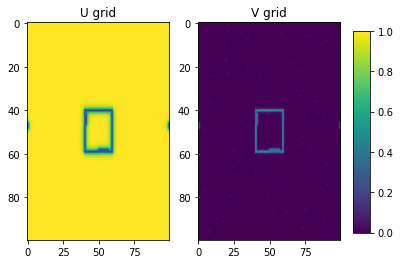

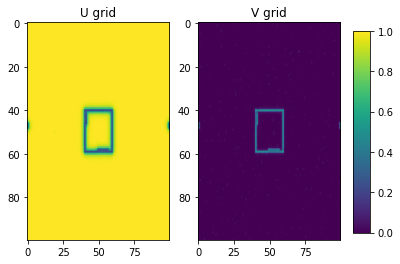

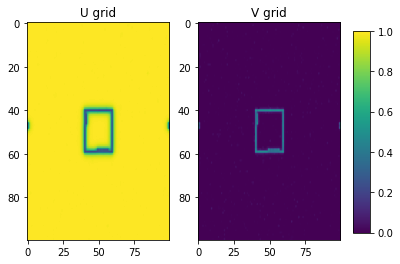

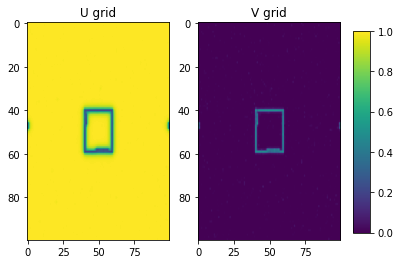

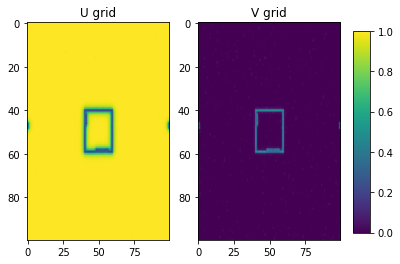

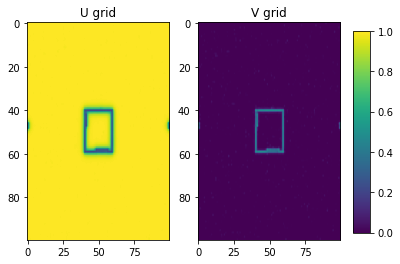

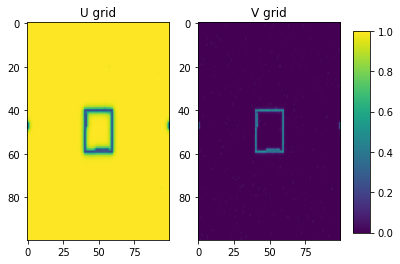

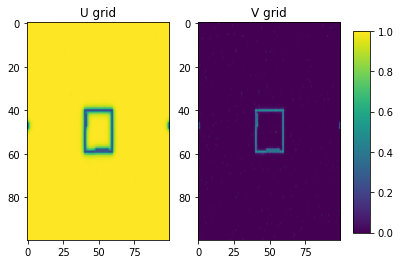

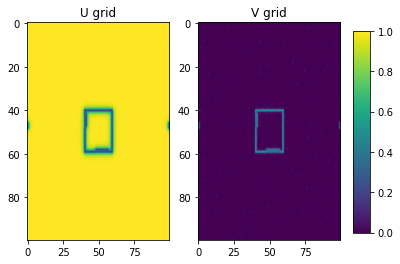

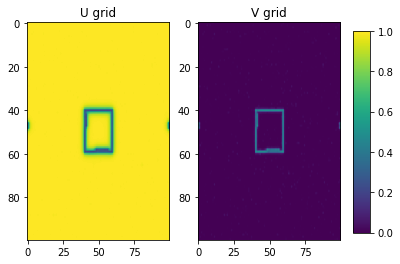

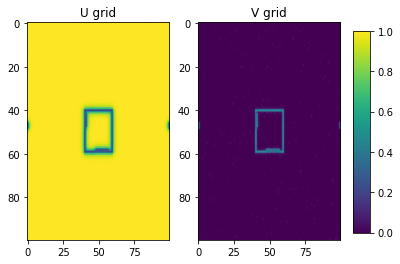

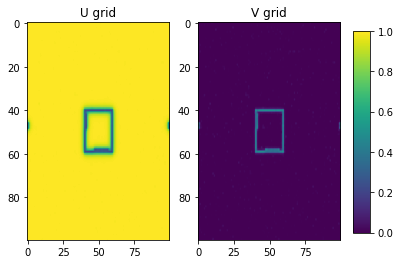

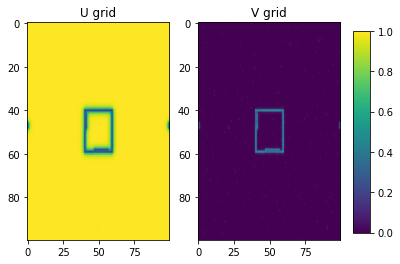

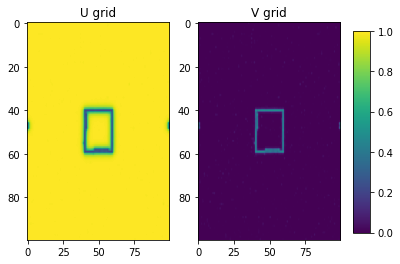

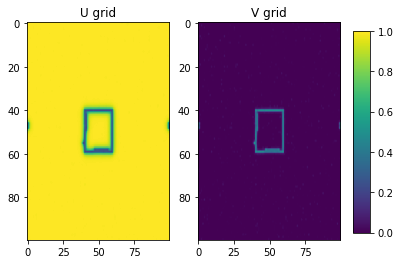

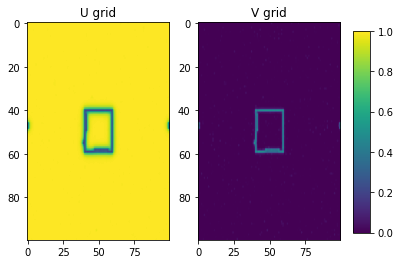

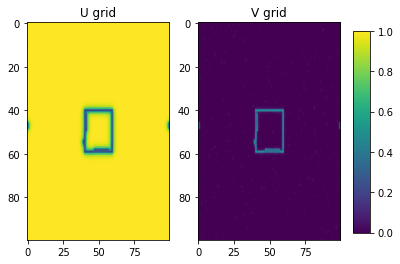

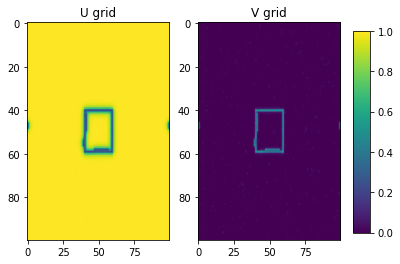

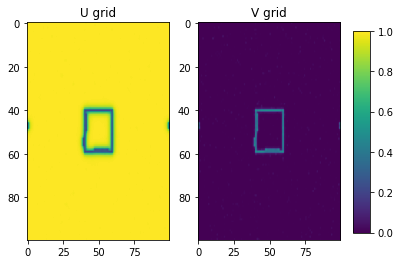

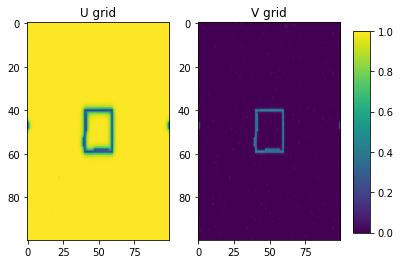

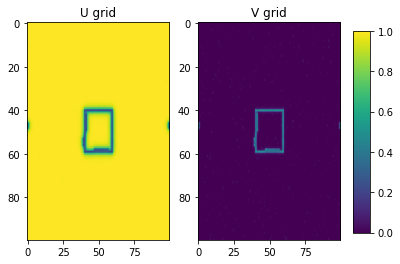

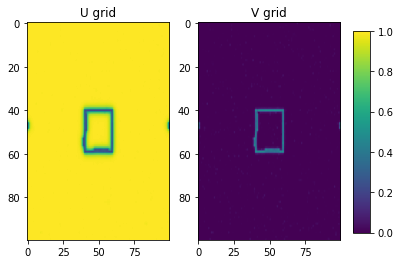

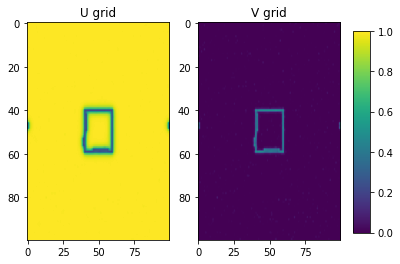

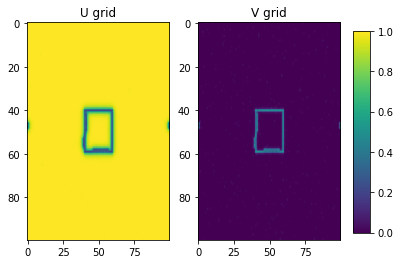

In [8]:
# Adding noise to the system 
U_grid,V_grid = init(N,10)
run(U_grid,V_grid, 5000, f, k, 0.05)